<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/MLC/blob/main/fisher_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import glob
import matplotlib.pyplot as plt

In [104]:
import zipfile
with zipfile.ZipFile('/content/happy-20231011T075633Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall('happy')
with zipfile.ZipFile('/content/surprise-20231011T080650Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall('surprise')


In [105]:
cv_img_happy = []
path = '/content/happy/happy/*.png'
for img in glob.glob(path):
    n= cv2.imread(img)
    cv_img_happy.append(cv2.cvtColor(n, cv2.COLOR_BGR2GRAY))
cv_img_supr = []
path = '/content/surprise/surprise/*.png'
for img in glob.glob(path):
    n= cv2.imread(img)
    cv_img_supr.append(cv2.cvtColor(n, cv2.COLOR_BGR2GRAY))

In [106]:
X_sur_train, X_sur_test, y_sur_train, y_sur_test = train_test_split(cv_img_supr, np.ones(len(cv_img_supr)), test_size=(len(cv_img_supr)-50)/len(cv_img_supr), random_state=42)
X_hap_train, X_hap_test, y_hap_train, y_hap_test = train_test_split(cv_img_happy, np.zeros(len(cv_img_happy)), test_size=(len(cv_img_happy)-50)/len(cv_img_happy), random_state=42)

In [107]:
X_sur_train=np.array(X_sur_train)
X_hap_train=np.array(X_hap_train)
X_sur_test=np.array(X_sur_test)
X_hap_test=np.array(X_hap_test)

In [108]:
X_sur_train=X_sur_train.reshape(len(X_sur_train),-1)
X_hap_train=X_hap_train.reshape(len(X_hap_train),-1)
X_sur_test=X_sur_test.reshape(len(X_sur_test),-1)
X_hap_test=X_hap_test.reshape(len(X_hap_test),-1)

In [109]:
from sklearn.decomposition import PCA


In [110]:
X_train=np.concatenate((X_sur_train, X_hap_train), axis=0)
X_test=np.concatenate((X_sur_test,X_hap_test),axis=0)
y_test=np.concatenate((y_sur_test,y_hap_test),axis=0)
y_train=np.concatenate((y_sur_train,y_hap_train),axis=0)

In [111]:
pca = PCA(50)
pca.fit(X_train)

PCA(n_components=50)

In [112]:
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

In [113]:
#np.mean(X_sur_train)
np.mean(X_hap_train)

91.57884122222222

In [114]:
X_train.shape


(100, 50)

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [116]:
clf.scalings_

array([[-3.07388768e-05],
       [-3.70833997e-05],
       [ 2.84500086e-05],
       [ 2.64184594e-04],
       [-2.26668441e-04],
       [ 9.42406286e-05],
       [ 5.16279771e-04],
       [ 2.93074731e-04],
       [-3.34898260e-04],
       [ 1.95040716e-04],
       [ 3.19874813e-05],
       [-2.28622286e-04],
       [-1.59529466e-04],
       [ 1.73339306e-04],
       [ 2.46058255e-06],
       [-1.68585099e-04],
       [ 9.48777583e-05],
       [ 2.07597918e-04],
       [ 1.26031110e-04],
       [ 4.82928757e-05],
       [ 1.91538106e-05],
       [ 8.01212135e-05],
       [ 2.58507792e-05],
       [ 6.40176896e-06],
       [ 3.48903846e-05],
       [ 1.13151266e-04],
       [-3.86731839e-05],
       [-9.25538011e-05],
       [ 4.07815460e-05],
       [-1.04959917e-05],
       [-2.61514964e-05],
       [ 5.66125973e-05],
       [-4.32778398e-05],
       [ 7.26613205e-05],
       [ 2.28921631e-05],
       [ 8.96761461e-05],
       [ 1.29457415e-05],
       [ 1.15174285e-04],
       [ 2.8

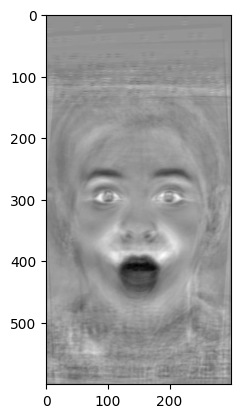

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Apply LDA and retrieve eigenvalues and eigenvectors
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

# Get eigenvalues and eigenvectors
eigenvalues = lda.explained_variance_ratio_
eigenvectors = lda.scalings_
#print(eigenvectors.T[0])
data_reconstructed = pca.inverse_transform(eigenvectors.T[0]/np.linalg.norm(eigenvectors.T[0])*np.linalg.norm(X_train).mean())

mat_data = np.asmatrix(data_reconstructed).reshape(600,300)
plt.imshow(mat_data,cmap='gray')



In [118]:
X_sur_train, X_sur_test, y_sur_train, y_sur_test = train_test_split(cv_img_supr, np.ones(len(cv_img_supr)), test_size=(len(cv_img_supr)-50)/len(cv_img_supr), random_state=42)
X_hap_train, X_hap_test, y_hap_train, y_hap_test = train_test_split(cv_img_happy, np.zeros(len(cv_img_happy)), test_size=(len(cv_img_happy)-50)/len(cv_img_happy), random_state=42)
X_sur_train=np.array(X_sur_train)
X_hap_train=np.array(X_hap_train)
X_sur_test=np.array(X_sur_test)
X_hap_test=np.array(X_hap_test)
X_sur_train=X_sur_train.reshape(len(X_sur_train),-1)
X_hap_train=X_hap_train.reshape(len(X_hap_train),-1)
X_sur_test=X_sur_test.reshape(len(X_sur_test),-1)
X_hap_test=X_hap_test.reshape(len(X_hap_test),-1)
X_train=np.concatenate((X_sur_train, X_hap_train), axis=0)
X_test=np.concatenate((X_sur_test,X_hap_test),axis=0)
y_test=np.concatenate((y_sur_test,y_hap_test),axis=0)
y_train=np.concatenate((y_sur_train,y_hap_train),axis=0)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pc_comp=range(50)
LDA_acc=[]
K1_acc=[]
K3_acc=[]
K5_acc=[]
LDA_acc_t=[]
K1_acc_t=[]
K3_acc_t=[]
K5_acc_t=[]
for i in pc_comp:
  pca = PCA(i+1)
  pca.fit(X_train)
  x_train=pca.transform(X_train)
  x_test=pca.transform(X_test)
  lda = LinearDiscriminantAnalysis()
  lda.fit_transform(x_train, y_train)
  y_train_pred = lda.predict(x_train)
  y_test_pred = lda.predict(x_test)
  LDA_acc_t.append(accuracy_score(y_test, y_test_pred))
  LDA_acc.append(accuracy_score(y_train, y_train_pred))
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_train)
  K1_acc.append(accuracy_score(y_train, y_pred))
  y_pred = knn.predict(x_test)
  K1_acc_t.append(accuracy_score(y_test, y_pred))
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_train)
  K3_acc.append(accuracy_score(y_train, y_pred))
  y_pred = knn.predict(x_test)
  K3_acc_t.append(accuracy_score(y_test, y_pred))
  knn = KNeighborsClassifier(n_neighbors=4)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_train)
  K5_acc.append(accuracy_score(y_train, y_pred))
  y_pred = knn.predict(x_test)
  K5_acc_t.append(accuracy_score(y_test, y_pred))

In [120]:
LDA_acc

[0.57,
 0.54,
 0.54,
 0.66,
 0.79,
 0.76,
 0.87,
 0.94,
 0.98,
 0.98,
 0.98,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

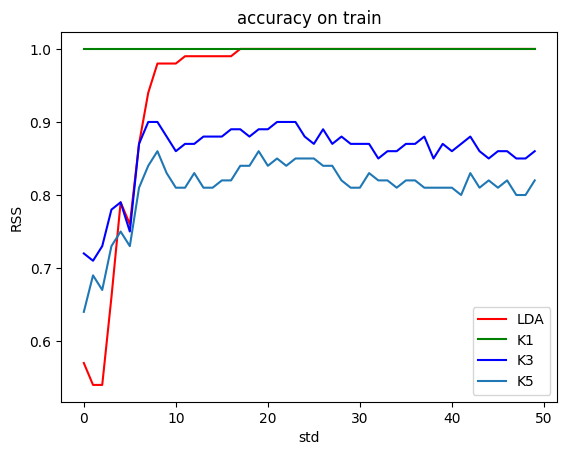

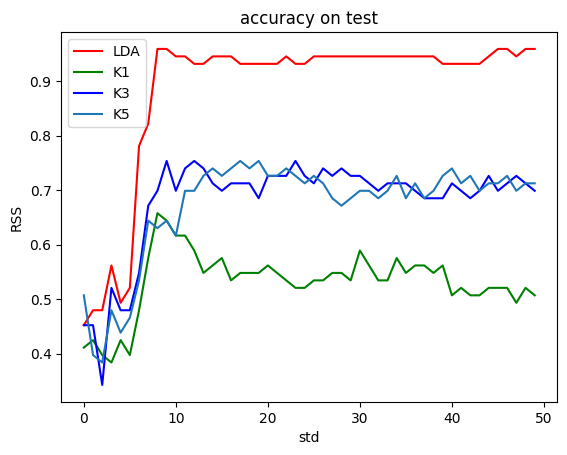

In [121]:
plt.plot(range(50), LDA_acc, color='r', label='LDA')
plt.plot(range(50), K1_acc, color='g', label='K1')
plt.plot(range(50), K3_acc, color='b', label='K3')
plt.plot(range(50), K5_acc,  label='K5')
plt.xlabel("std")
plt.ylabel("RSS")
plt.title("accuracy on train")

plt.legend()


plt.show()


plt.figure()
plt.plot(range(50), LDA_acc_t, color='r', label='LDA')
plt.plot(range(50), K1_acc_t, color='g', label='K1')
plt.plot(range(50), K3_acc_t, color='b', label='K3')
plt.plot(range(50), K5_acc_t,  label='K5')


plt.xlabel("std")
plt.ylabel("RSS")
plt.title("accuracy on test")
plt.legend()
plt.show()